<a href="https://colab.research.google.com/github/KARTHIK01122004/dv_task/blob/main/task4_DV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

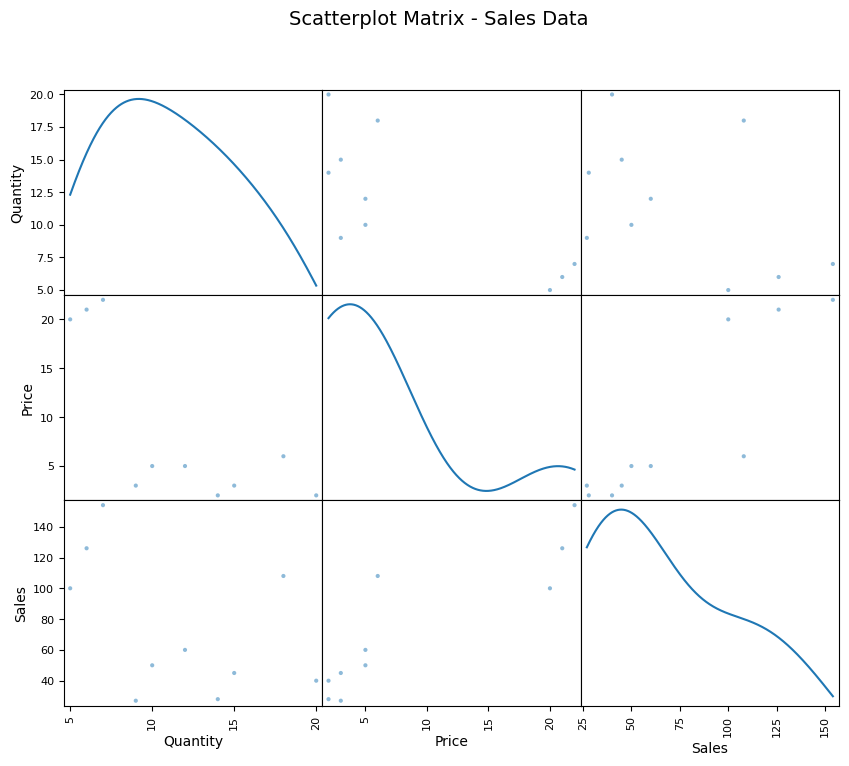

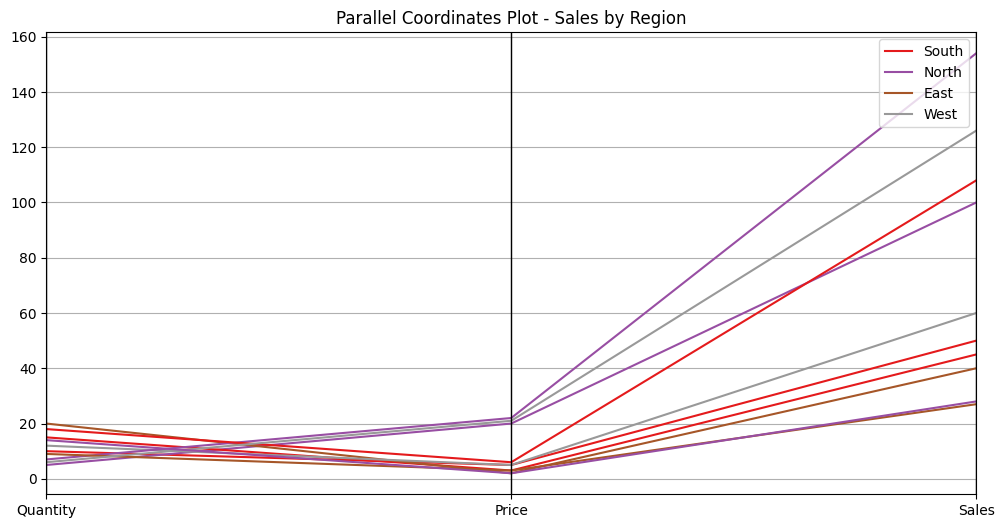

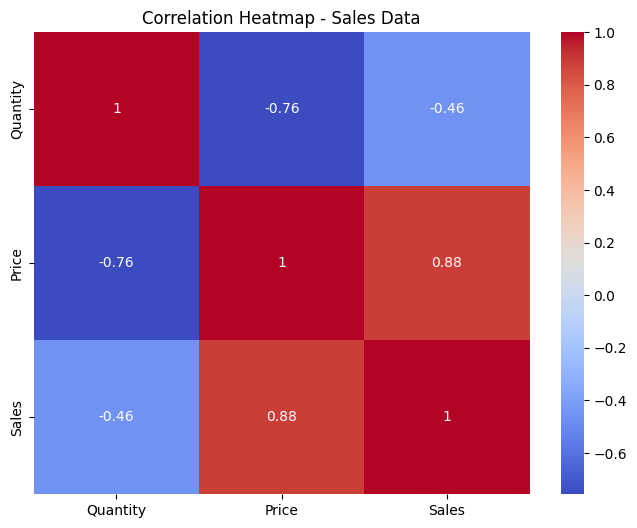

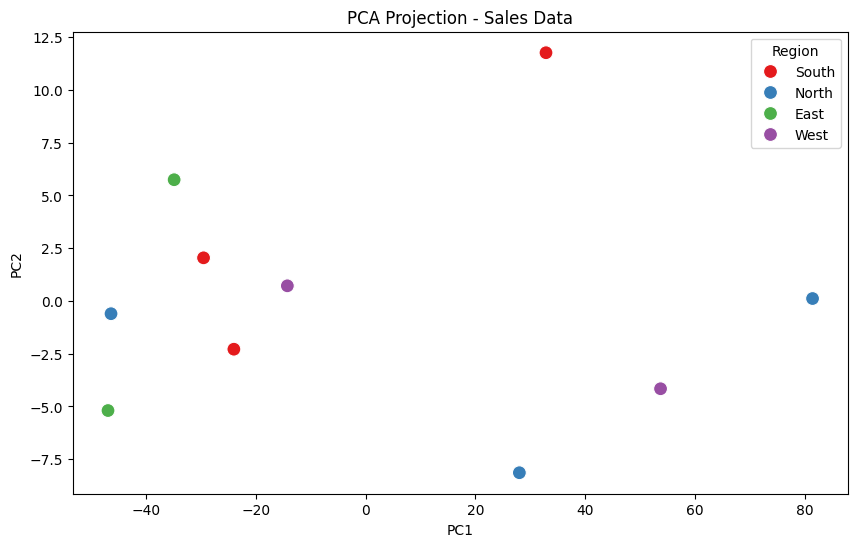

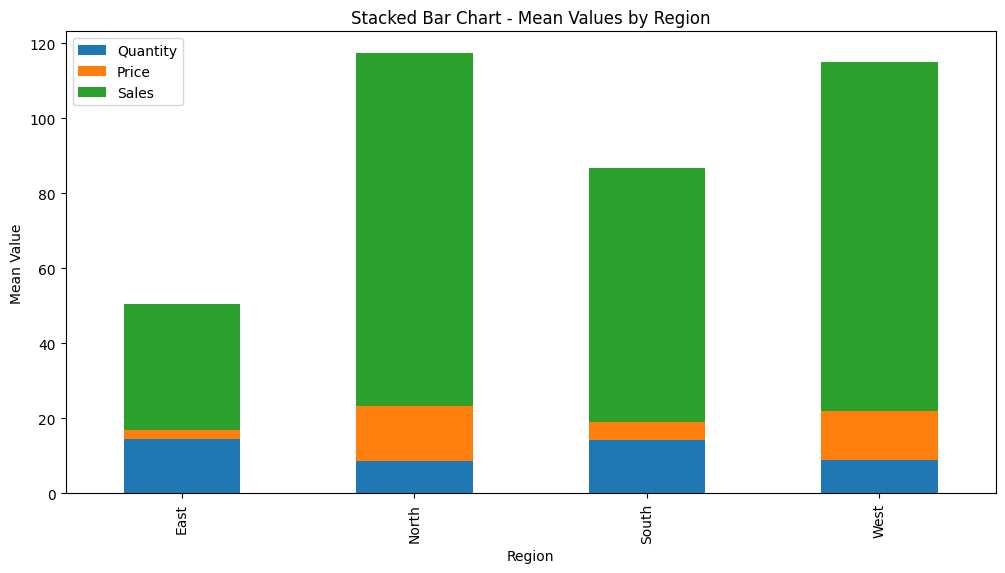

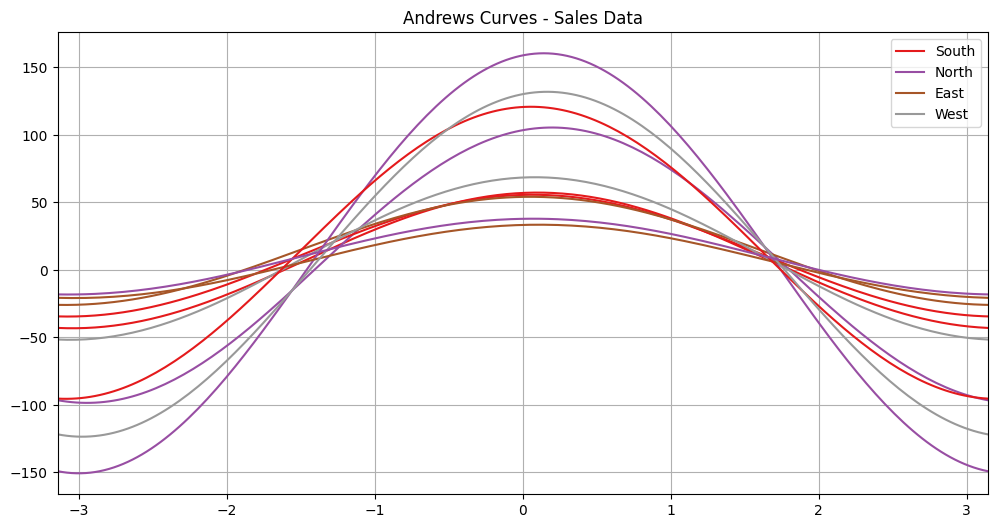

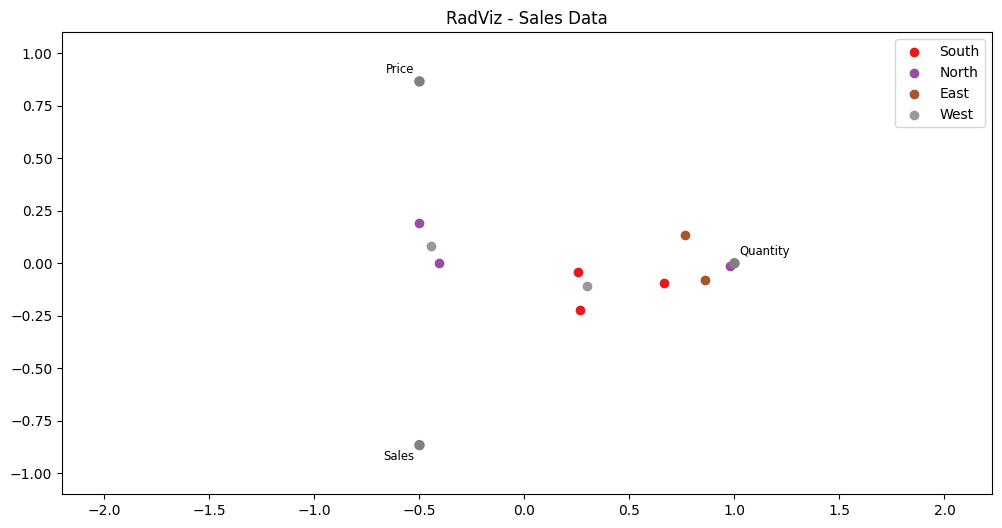

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix, parallel_coordinates, andrews_curves, radviz
import seaborn as sns
from sklearn.decomposition import PCA

# Load dataset
df_sales = pd.read_csv("sales_data_full.csv")

# Feature engineering
df_sales["Sales"] = df_sales["Quantity"] * df_sales["Price"]

# ---- Scatterplot Matrix ----
scatter_matrix(df_sales[["Quantity", "Price", "Sales"]], figsize=(10, 8), diagonal="kde")
plt.suptitle("Scatterplot Matrix - Sales Data", fontsize=14)
plt.show()

# ---- Parallel Coordinates Plot ----
plt.figure(figsize=(12, 6))
parallel_coordinates(df_sales[["Quantity", "Price", "Sales", "Region"]], "Region", colormap=plt.get_cmap("Set1"))
plt.title("Parallel Coordinates Plot - Sales by Region")
plt.show()

# ---- Correlation Heatmap ----
plt.figure(figsize=(8, 6))
sns.heatmap(df_sales[["Quantity", "Price", "Sales"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap - Sales Data")
plt.show()

# ---- PCA (reduce to 2D) ----
pca = PCA(n_components=2)
features = df_sales[["Quantity", "Price", "Sales"]]
pca_result = pca.fit_transform(features)
pca_df = pd.DataFrame(pca_result, columns=["PC1", "PC2"])
pca_df["Region"] = df_sales["Region"]

plt.figure(figsize=(10, 6))
sns.scatterplot(x="PC1", y="PC2", hue="Region", data=pca_df, palette="Set1", s=100)
plt.title("PCA Projection - Sales Data")
plt.show()

# ---- Stacked Bar Chart (mean values per region) ----
class_means = df_sales.groupby("Region")[["Quantity", "Price", "Sales"]].mean()
class_means.plot(kind="bar", stacked=True, figsize=(12, 6))
plt.title("Stacked Bar Chart - Mean Values by Region")
plt.ylabel("Mean Value")
plt.show()

# ---- Andrews Curves ----
plt.figure(figsize=(12, 6))
andrews_curves(df_sales[["Quantity", "Price", "Sales", "Region"]], "Region", colormap="Set1")
plt.title("Andrews Curves - Sales Data")
plt.show()

# ---- RadViz ----
plt.figure(figsize=(12, 6))
radviz(df_sales[["Quantity", "Price", "Sales", "Region"]], "Region", colormap="Set1")
plt.title("RadViz - Sales Data")
plt.show()
